In [8]:
import pandas as pd

In [10]:
df = pd.read_csv('languages_wiki.csv')

In [70]:
df

,Language,Native speakers(in millions),Language family,Branch
0,Mandarin Chinese,941,Sino-Tibetan,Sinitic
1,Spanish,486,Indo-European,Romance
2,English,380,Indo-European,Germanic
3,Hindi,345,Indo-European,Indo-Aryan
4,Bengali,237,Indo-European,Indo-Aryan
5,Portuguese,236,Indo-European,Romance
6,Russian,148,Indo-European,Balto-Slavic
7,Japanese,123,Japonic,Japanese
8,Yue Chinese,86,Sino-Tibetan,Sinitic
9,Vietnamese,85,Austroasiatic,Vietic


# 1) What is the total number of native speakers across all languages in the dataset?

In [32]:
total_native_speakers = df['Native speakers(in millions)'].sum()
total_native_speakers 

4401

The total number of native speakers of all languages in this table is 4,401,000,000

# 2) How many different types of language family are there?

In [25]:
unique_lang_families = df['Language family'].unique()
count_lang_families = len(unique_lang_families)
unique_lang_families

array(['Sino-Tibetan', 'Indo-European', 'Japonic', 'Austroasiatic',
       'Turkic', 'Dravidian', 'Koreanic', 'Afroasiatic', 'Austronesian'],
      dtype=object)

In [27]:
count_lang_families

9

There are 9 different types of language family in the table

# 3) What is the total number of native speakers per language family?

In [45]:
df.groupby('Language family')['Native speakers(in millions)'].sum().sort_values(ascending=False)

Language family
Indo-European    2454
Sino-Tibetan     1161
Afroasiatic       183
Dravidian         162
Japonic           123
Austroasiatic      85
Turkic             84
Koreanic           81
Austronesian       68
Name: Native speakers(in millions), dtype: int64

# 4. What are the top 3 most common language families? 

In [52]:
top_3_lang_families = df.groupby('Language family')['Native speakers(in millions)'].sum().sort_values(ascending=False)[:3]
top_3_lang_families

Language family
Indo-European    2454
Sino-Tibetan     1161
Afroasiatic       183
Name: Native speakers(in millions), dtype: int64

# 5. Create a pie chart showing the top 3 most common language families

<Axes: ylabel='Native speakers(in millions)'>

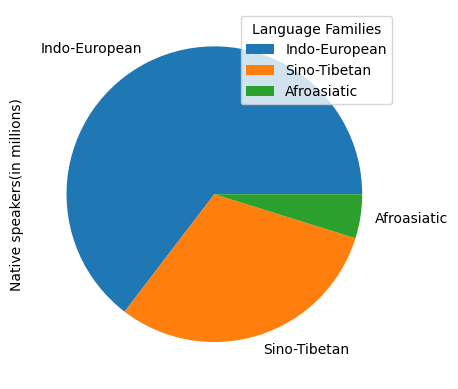

In [72]:
pie_chart_top_3_lang_families = top_3_lang_families.plot.pie(y='Native speakers(in millions)')
pie_chart_top_3_lang_families.legend(
    labels=top_3_lang_families.index,  
    title="Language Families",        
    loc="upper right"                        
)


pie_chart_top_3_lang_families

# 6. What is the most commonly occuring Language family - branch pair?

In [88]:
df.groupby(['Language family', 'Branch'])['Native speakers(in millions)'].sum().sort_values(ascending=False)

Language family  Branch           
Sino-Tibetan     Sinitic              1161
Indo-European    Indo-Aryan            928
                 Romance               860
                 Germanic              456
                 Balto-Slavic          148
Afroasiatic      Semitic               129
Japonic          Japanese              123
Austroasiatic    Vietic                 85
Turkic           Oghuz                  84
Dravidian        South-Central          83
Koreanic         —                      81
Dravidian        South                  79
Austronesian     Malayo-Polynesian      68
Indo-European    Iranian                62
Afroasiatic      Chadic                 54
Name: Native speakers(in millions), dtype: int64

In [95]:
top_lang_branch_pair = df.groupby(['Language family', 'Branch'])['Native speakers(in millions)'].sum().sort_values(ascending=False)[:1]
top_lang_branch_pair 

Language family  Branch 
Sino-Tibetan     Sinitic    1161
Name: Native speakers(in millions), dtype: int64

The most common language family - branch pair is Sino-Tibetan, Sinitic

# 7. Which languages are Sino-Tibetan in the table?

In [107]:
df[df['Language family'] == 'Sino-Tibetan']['Language'].tolist()

['Mandarin Chinese', 'Yue Chinese', 'Wu Chinese', 'Southern Min']

The Sino-Tibetan languages in the table are: **Mandarin Chinese, Yue Chinese, Wu Chinese, Southern Min**

# 8. Display a bar chart of the native speakers of all Romance and Germanic languages 

In [25]:
romance_lang = df[(df['Branch'] == 'Romance') | (df['Branch'] == 'Germanic')]
romance_lang

,Language,Native speakers(in millions),Language family,Branch
1,Spanish,486,Indo-European,Romance
2,English,380,Indo-European,Germanic
5,Portuguese,236,Indo-European,Romance
18,Standard German,76,Indo-European,Germanic
19,French,74,Indo-European,Romance
22,Italian,64,Indo-European,Romance


<Axes: xlabel='Language'>

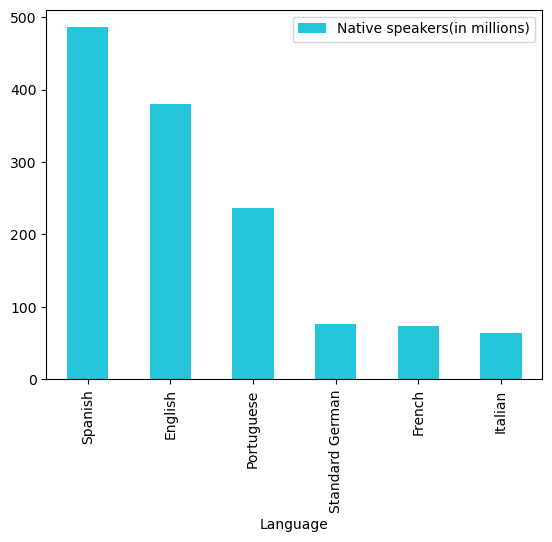

In [29]:
romance_lang.plot.bar(x='Language', y='Native speakers(in millions)', color='#26C6DA')

# 9. What percentage of total native speakers is represented by the top 5 languages?

In [40]:
top_5_languages = df[:5]['Native speakers(in millions)'].sum()
top_5_languages

2389

In [44]:
((top_5_languages / total_native_speakers) * 100).round(2)

54.28

54.28% of total native speakers is represented by the top 5 languages

# 10. Which branch has the most native speakers, and which has the least?

In [78]:

branches_df = df.groupby('Branch')['Native speakers(in millions)'].sum().sort_values(ascending=False)
branches_df

Branch
Sinitic              1161
Indo-Aryan            928
Romance               860
Germanic              456
Balto-Slavic          148
Semitic               129
Japanese              123
Vietic                 85
Oghuz                  84
South-Central          83
—                      81
South                  79
Malayo-Polynesian      68
Iranian                62
Chadic                 54
Name: Native speakers(in millions), dtype: int64

The branch with the most native speakers is 'Sinitic', the branch with the least native speakers is 'Chadic'